# Project

In this project, our aim is to building a model for predicting churn. Churn is the percentage of customers that stopped using your company's product or service during a certain time frame. Thus, in the given dataset, our label will be `Churn` column.

## Steps
- Read the `churn.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Logistic Regression, Decision Trees and one other appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>Olasumbo Banjoko</h2>

# Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [222]:
# Read csv
url = "https://raw.githubusercontent.com/KutayAkalin/ML_Course_9-11-20/main/Project/churn.csv"
data = pd.read_csv(url)
data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [223]:
# Describe our data for each feature and use .info() for get information about our dataset
data.info()
# Analys missing values
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

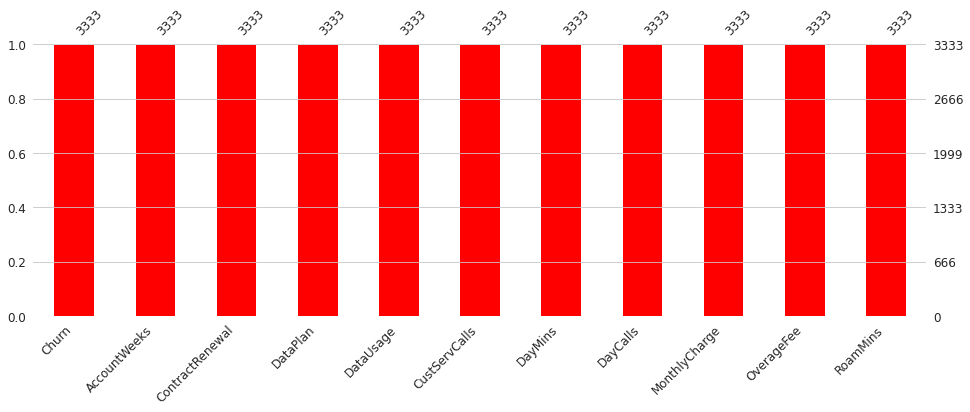

In [224]:
#missing values in the dataset
import missingno as mssno
seed = 45
mssno.bar(data,color='r',figsize=(16,5),fontsize=12)

In [225]:
data.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


# Exploratory Data Analysis

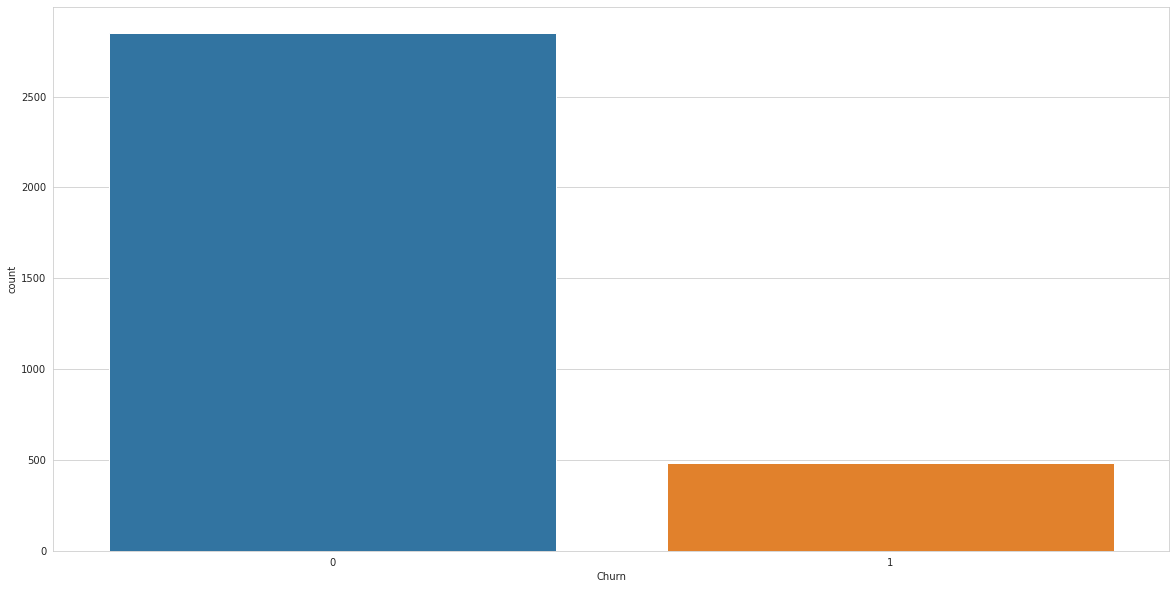

In [226]:
# Our label Distribution (countplot)
sns.countplot(x='Churn', data=data )

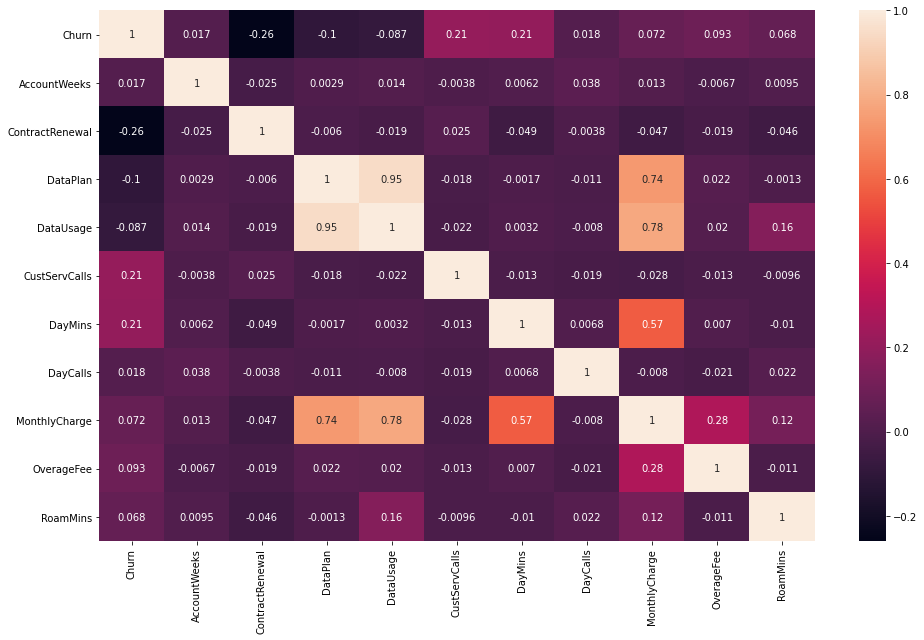

In [10]:
#Heatmap for interval variable
intercor = data.corr()
plt.figure(figsize=(14,9))
sns.heatmap(intercor,annot=True)
plt.tight_layout()

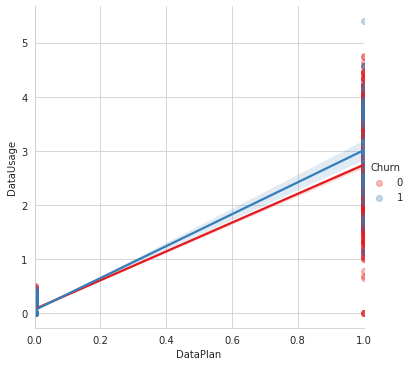

In [227]:
sns.lmplot(x='DataPlan', y='DataUsage', data=data, hue='Churn', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

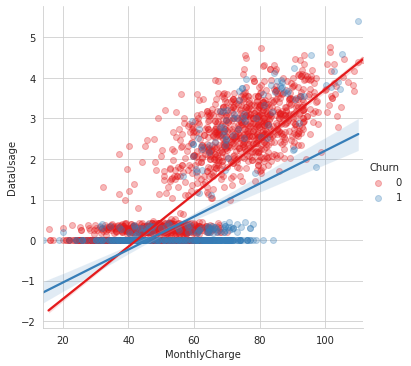

In [228]:
# using lmplot check the impact of corr variables on churn
sns.lmplot(x='MonthlyCharge', y='DataUsage', data=data, hue='Churn', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()                 # it intersects with the Churn line at 0 and 40 for dataplan and usage and monthly charge indicating the customers that stopped 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


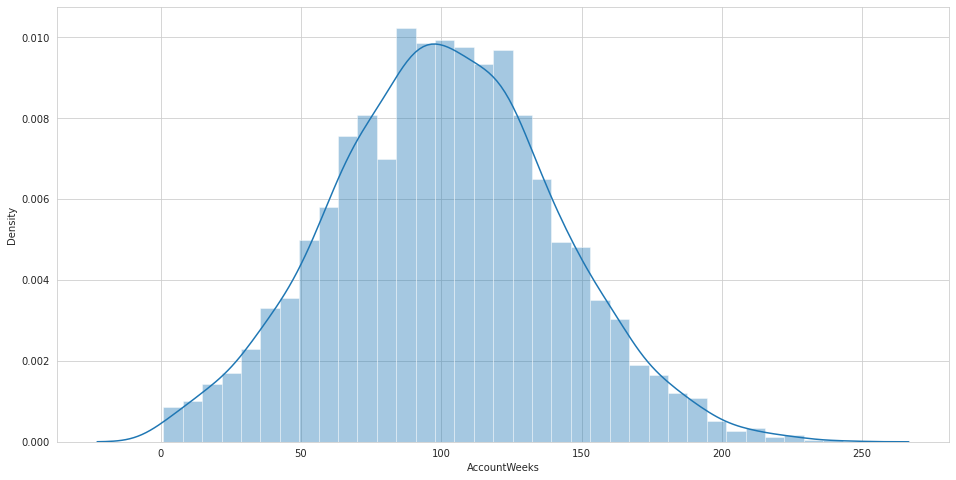

In [229]:
# Example EDA
plt.figure(figsize=(16, 8))
sns.distplot(data["AccountWeeks"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

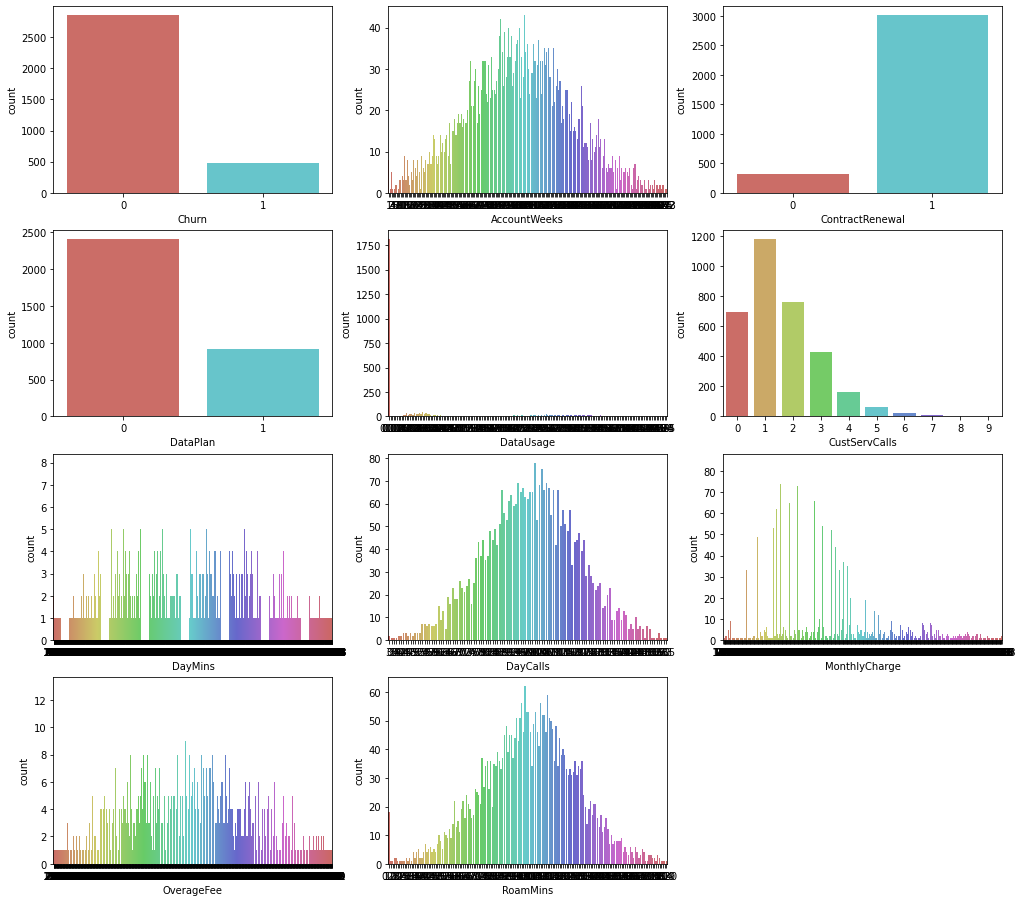

In [21]:
#grouped varible visualization
plt.figure(figsize=(17,24))
for i, c in enumerate(data):
    ax = plt.subplot(6,3,i+1)
    sns.countplot(data[c],palette='hls')

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?[link text](https://quantdare.com/what-is-the-difference-between-feature-extraction-and-feature-selection/)
- Do we need to generate new features? 
- Split Train and Test dataset. (0.7/0.3) [link text](https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35#:~:text=How%20to%20perform%20feature%20scaling%3F%201%20Min-Max%20scaler.,its%20maximum%20absolute%20value.%20...%20More%20items...%20)

# Do we need feature scaling 
Yes, we need feature scaling to normalize our data as our distribution fall around the mean of 0 and standard deviation of one, we need to generate new feature 

In [230]:
#Checking for duplicated values
data.duplicated(subset=['Churn','AccountWeeks']).any()        #there are duplicated values 

# looping through to get a better view 
data.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Length: 3333, dtype: bool

**Preprocessing**

Since, our target is to predict the % of customers dropped in a company, Churn would be our target variable for analysis.

In [232]:
# Drop one of the correlated variables of Dataplan and DataUsage as they give the same information
dat = data.drop('DataPlan', axis = 1)

In [233]:
X = dat.drop('Churn', axis = 1)
y = dat['Churn']

In [234]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(dat))
z

array([[0.41167182, 0.67648946, 0.32758048, ..., 1.99072703, 0.0715836 ,
        0.08500823],
       [0.41167182, 0.14906505, 0.32758048, ..., 1.56451025, 0.10708191,
        1.24048169],
       [0.41167182, 0.9025285 , 0.32758048, ..., 0.26213309, 1.57434567,
        0.70312091],
       ...,
       [0.41167182, 1.83505538, 0.32758048, ..., 0.01858065, 1.73094204,
        1.3837779 ],
       [0.41167182, 2.08295458, 3.05268496, ..., 0.38390932, 0.81704825,
        1.87621082],
       [0.41167182, 0.67974475, 0.32758048, ..., 2.66049626, 1.28129669,
        1.24048169]])

In [235]:
outliers = list(set(np.where(z > 3)[0]))

len(outliers)

414

In [251]:
# create data set for scaling and transformation
new_df = dat.drop(outliers,axis = 0).reset_index(drop = False)
display(new_df)

y_new = new_df["Churn"]
len(y_new)

X_new = new_df.drop('index', axis = 1)
X_new = new_df.drop('Churn', axis=1)

,index,Churn,AccountWeeks,ContractRenewal,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,0,128,1,2.70,1,265.1,110,89.0,9.87,10.0
1,1,0,107,1,3.70,1,161.6,123,82.0,9.78,13.7
2,2,0,137,1,0.00,0,243.4,114,52.0,6.06,12.2
3,6,0,121,1,2.03,3,218.2,88,87.3,17.43,7.5
4,8,0,117,1,0.19,1,184.5,97,63.9,17.58,8.7
...,...,...,...,...,...,...,...,...,...,...,...
2914,3327,0,79,1,0.00,2,134.7,98,40.0,9.49,11.8
2915,3328,0,192,1,2.67,2,156.2,77,71.7,10.78,9.9
2916,3329,0,68,1,0.34,3,231.1,57,56.4,7.67,9.6
2917,3330,0,28,1,0.00,2,180.8,109,56.0,14.44,14.1


In [252]:
# Scaling the data generated from cleaning via outlier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_scaled = StandardScaler().fit_transform(X_new)
X_scaled

array([[-1.73218169,  0.69196206,  0.        , ...,  2.05929645,
        -0.068431  , -0.0941079 ],
       [-1.73114317,  0.1624696 ,  0.        , ...,  1.62161451,
        -0.10450144,  1.29308134],
       [-1.73010465,  0.9188874 ,  0.        , ..., -0.25416527,
        -1.59541298,  0.73070732],
       ...,
       [ 1.72505223, -0.82087355,  0.        , ...,  0.0209491 ,
        -0.95015288, -0.2440743 ],
       [ 1.72609075, -1.82943062,  0.        , ..., -0.0040613 ,
         1.76314581,  1.44304774],
       [ 1.72816779, -0.66958999,  0.        , ...,  2.74708237,
         1.30625356,  1.29308134]])

# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

In [254]:
from sklearn.model_selection import train_test_split, cross_validate

#Scaling and outlier removed
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_new, test_size=0.3, random_state=42)

models = LogisticRegression(random_state=42, n_jobs=-1)
cv = cross_validate(models,X_train,y_train,cv = 3, n_jobs=-1, return_estimator=True)

print("Mean training accuracy: {}".format(np.mean(cv['test_score'])))
print("Test accuracy: {}".format(cv["estimator"][0].score(X_test,y_test)))         # this output is not realistic perharps dropping the outliers and correlate variables did this 

Mean training accuracy: 0.8981889378365149
Test accuracy: 0.8881278538812786


In [255]:
cv["estimator"][0]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

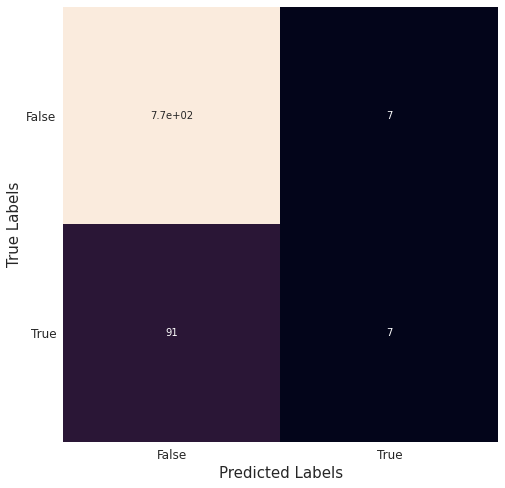

In [256]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
pred = cv["estimator"][0].predict(X_test)

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(["False","True"], fontsize = 12)
ax.yaxis.set_ticklabels(["False","True"], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

Without preprocessing and removing outliers

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

models = LogisticRegression(random_state=42,n_jobs=-1)
cv = cross_validate(models,X_train,y_train,cv = 3, n_jobs=-1, return_estimator=True)

print("Mean training accuracy: {}".format(np.mean(cv['test_score'])))
print("Test accuracy: {}".format(cv["estimator"][0].score(X_test,y_test)))

Mean training accuracy: 0.8521205744856131
Test accuracy: 0.846


**Evaluate the logistic regression without preprocessing**

# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.

In [258]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

final_model = cv["estimator"][0]

y_pred = final_model.predict(X_test)

print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("F1 Score:",f1_score(y_test,y_pred))

Accuracy: 0.846
Precision: 0.39215686274509803
Recall: 0.13986013986013987
F1 Score: 0.2061855670103093


In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, cv["estimator"][0].predict(X_test)))  # we see f1  score where precision and recall is 0.92 for 0 and  0.19 for  1 so and imbalance exist due to an uneven distribution between precision and recall

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       857
           1       0.41      0.13      0.19       143

    accuracy                           0.85      1000
   macro avg       0.64      0.55      0.55      1000
weighted avg       0.80      0.85      0.81      1000



**ROC** Using ROC to analyse performance at different threshold as we expect it may be good at identify 0s than ones. ROC separability identifier is 0.79

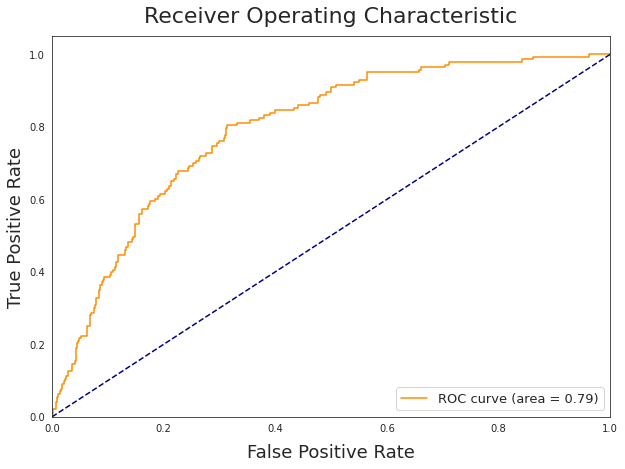

In [53]:
from sklearn.metrics import roc_curve, auc

y_pred_prop = final_model.predict_proba(X_test)[:,1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_prop)
roc_auc_log = auc(fpr_log, tpr_log)

sns.set_style("white")
plt.figure(figsize=(10, 7))
plt.plot(fpr_log, tpr_log, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc_log)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=18,labelpad =10)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Receiver Operating Characteristic',fontsize=22).set_position([.5, 1.02])
plt.legend(loc="lower right",fontsize=13)
plt.show()


**Method Three**

Without removing outliers but includes Scaling and values aggregating 

In [259]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,confusion_matrix, roc_auc_score ,roc_curve,auc
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,StratifiedKFold
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle

**Data Sampling** 

To be able to handle imbalanced classes

In [279]:
train = data.drop('DataPlan',axis = 1).reset_index(drop = False)
display(train)

test = y[list(train["index"])]
len(test)

train_new = train.drop('index', axis = 1)

,index,Churn,AccountWeeks,ContractRenewal,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,0,128,1,2.70,1,265.1,110,89.0,9.87,10.0
1,1,0,107,1,3.70,1,161.6,123,82.0,9.78,13.7
2,2,0,137,1,0.00,0,243.4,114,52.0,6.06,12.2
3,3,0,84,0,0.00,2,299.4,71,57.0,3.10,6.6
4,4,0,75,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,3328,0,192,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,3329,0,68,1,0.34,3,231.1,57,56.4,7.67,9.6
3330,3330,0,28,1,0.00,2,180.8,109,56.0,14.44,14.1
3331,3331,0,184,0,0.00,2,213.8,105,50.0,7.98,5.0


In [280]:
desired_apriori=0.10

# Get the indices per target value
idx_0 = train[train.Churn == 0].index
idx_1 = train[train.Churn == 1].index

# Get original number of records per Churn value
nb_0 = len(train.loc[idx_0])        #number of zeros is more at 2850
nb_1 = len(train.loc[idx_1])       #number of ones is less at 483

# Calculate the undersampling rate and resulting number of records with target=0
undersampling_rate = ((1-desired_apriori)*nb_1)/(nb_0*desired_apriori)
undersampled_nb_1 = int(undersampling_rate*nb_1)        # since nb_1 is the one undersampled we reshuffle 
print('Rate to undersample records with target=0: {}'.format(undersampling_rate))
print('Number of records with target=0 after undersampling: {}'.format(undersampled_nb_1))


Rate to undersample records with target=0: 1.5252631578947369
Number of records with target=0 after undersampling: 736


In [281]:
# Randomly select records with target=0 to get at the desired a priori
undersampled_idx = shuffle(idx_0, random_state=42, n_samples=undersampled_nb_1)

# Construct list with remaining indices
idx_list = list(undersampled_idx) + list(idx_1)

# Return undersample data frame
train = train.loc[idx_list].reset_index(drop=True)

**Logistic Regression**

In [282]:
X = train.drop(['Churn','index'],axis=1)
y = train['Churn']

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.3, random_state=42)   

kf = StratifiedKFold(n_splits=5,random_state=seed,shuffle=True)
pred_test_full=0
cv_score=[]
i=1
for train_index,test_index in kf.split(X,y):    
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    lr = LogisticRegression(class_weight='balanced',C=0.003)
    lr.fit(xtr, ytr)
    pred_test = lr.predict_proba(xvl)[:,1]
    score = roc_auc_score(yvl,pred_test)
    print('roc_auc_score',score)
    cv_score.append(score)
    pred_test_full += lr.predict_proba(X_test)[:,1]
    i+=1


1 of kfold 5
roc_auc_score 0.7614724099099099

2 of kfold 5
roc_auc_score 0.7666035486359492

3 of kfold 5
roc_auc_score 0.6294971596886177

4 of kfold 5
roc_auc_score 0.738971877410758

5 of kfold 5
roc_auc_score 0.7574404761904763


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [85]:
print('Confusion matrix\n',confusion_matrix(yvl,lr.predict(xvl)))
print('Cv',cv_score,'\nMean cv Score',np.mean(cv_score))    #too low I will probably try to scale again using logistic regression to see if our performance improves

Confusion matrix
 [[100  47]
 [ 33  63]]
Cv [0.7614724099099099, 0.7666035486359492, 0.6294971596886177, 0.738971877410758, 0.7574404761904763] 
Mean cv Score 0.7307970943671422


**ROC**

To check separability of 0s and ones and guage the perforamce of our prediction

Text(0.5, 0, 'False positive rate')

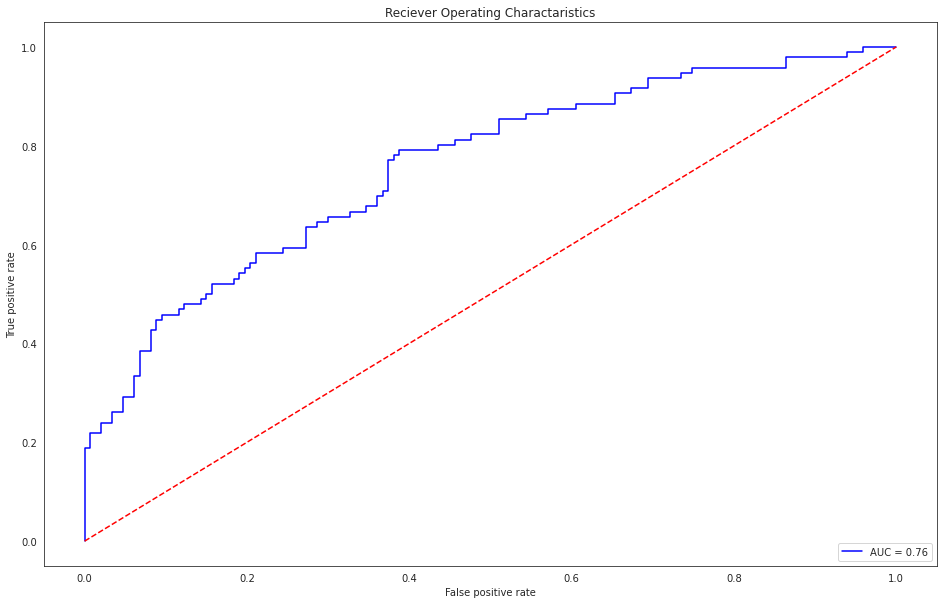

In [86]:
proba = lr.predict_proba(xvl)[:,1]
fpr,tpr, threshold = roc_curve(yvl,proba)
auc_val = auc(fpr,tpr)

plt.figure(figsize=(16,10))
plt.title('Reciever Operating Charactaristics')
plt.plot(fpr,tpr,'b',label = 'AUC = %0.2f' % auc_val)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

**Logistic Regression with Standard Scaling**

Data Sampling done on train data already so we section label and target then scale. (outcome not different as without scaling)

In [106]:
y_n = y[list(train["Churn"])]
len(y_n)

X_n = train.drop(train.loc[:, 'index':'Churn'], axis = 1)

In [108]:
# Scaling the data generated from cleaning via outlier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
Xn_scaled = StandardScaler().fit_transform(X_n)
Xn_scaled

array([[-0.31509793,  0.41486791, -0.48142073, ..., -0.54041471,
        -0.81816203, -1.47727837],
       [-0.36414401,  0.41486791,  1.66106691, ...,  1.41288046,
        -0.49450044,  0.09300619],
       [-0.46223617,  0.41486791, -0.60000861, ..., -0.75339081,
        -0.05242607, -0.29084115],
       ...,
       [ 0.4941624 , -2.41040575, -0.36283286, ..., -0.81424113,
        -0.17083885, -0.22105072],
       [-0.97722002,  0.41486791, -0.60000861, ...,  1.25466963,
         1.1948552 ,  0.4070631 ],
       [ 0.3715472 ,  0.41486791, -0.29168013, ..., -0.69862553,
         0.8751407 ,  1.13986256]])

In [118]:
X_train, X_test, y_train, y_test = train_test_split(Xn_scaled , y_n, test_size=0.3, random_state=42)   

kf = StratifiedKFold(n_splits=5,random_state=seed,shuffle=True)
pred_testn_full=0
cv_score=[]
i=1
for train_index,test_index in kf.split(X,y):    
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    lr = LogisticRegression(class_weight='balanced',C=0.003)
    lr.fit(xtr, ytr)
    pred_test = lr.predict_proba(xvl)[:,1]
    score = roc_auc_score(yvl,pred_test)
    print('roc_auc_score',score)
    cv_score.append(score)
    pred_testn_full += lr.predict_proba(X_test)[:,1]
    i+=1


1 of kfold 5
roc_auc_score 0.7614724099099099

2 of kfold 5
roc_auc_score 0.7666035486359492

3 of kfold 5
roc_auc_score 0.6294971596886177

4 of kfold 5
roc_auc_score 0.738971877410758

5 of kfold 5
roc_auc_score 0.7574404761904763


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


**Without Scaling, transforming the LR**

Dealing with imbalance only

In [155]:
model = LogisticRegression(random_state = 42)

model.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [156]:
print("Classes: ", model.classes_)
print("Intercept: ",model.intercept_)
print("Coef: ",model.coef_)

Classes:  [0 1]
Intercept:  [-0.64204514]
Coef:  [[-1.02004902e-03 -2.60498467e+00  1.62966788e-02  4.56404890e-01
   1.46667019e-02 -5.53437348e-03 -2.99512204e-02  1.24777098e-01
  -6.26414743e-03]]


In [131]:
print("Probability: ",model.predict_proba(X))

Probability:  [[0.80960075 0.19039925]
 [0.89410262 0.10589738]
 [0.69053537 0.30946463]
 ...
 [0.0827862  0.9172138 ]
 [0.13095713 0.86904287]
 [0.48569689 0.51430311]]


In [132]:
model.predict(X)

array([0, 0, 0, ..., 1, 1, 1])

In [133]:
confusion_matrix(y, model.predict(X))

array([[623, 113],
       [206, 277]])

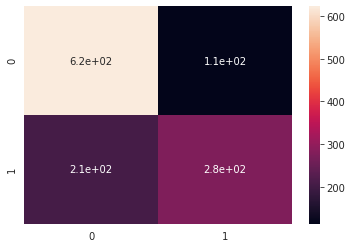

In [134]:
import seaborn as sns

cm = confusion_matrix(y, model.predict(X))
sns.heatmap(cm, annot=True)

In [135]:
print(classification_report(y, model.predict(X))) #imbalance cured

              precision    recall  f1-score   support

           0       0.75      0.85      0.80       736
           1       0.71      0.57      0.63       483

    accuracy                           0.74      1219
   macro avg       0.73      0.71      0.72      1219
weighted avg       0.74      0.74      0.73      1219



In [146]:
model = LogisticRegression(solver='liblinear', C=1.0, random_state=0)  #lbfgs didnot give me a better precision so I used liblinear 
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [147]:
model.intercept_

array([-3.07631322])

In [148]:
model.score(X, y)

0.760459392945037

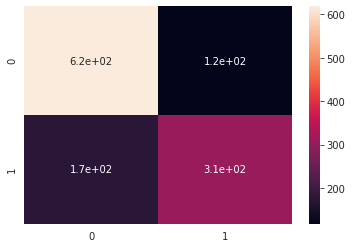

In [149]:
sns.heatmap(confusion_matrix(y, model.predict(X)), annot=True)

In [150]:
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       736
           1       0.72      0.64      0.68       483

    accuracy                           0.76      1219
   macro avg       0.75      0.74      0.74      1219
weighted avg       0.76      0.76      0.76      1219



**Using Decision Tree**

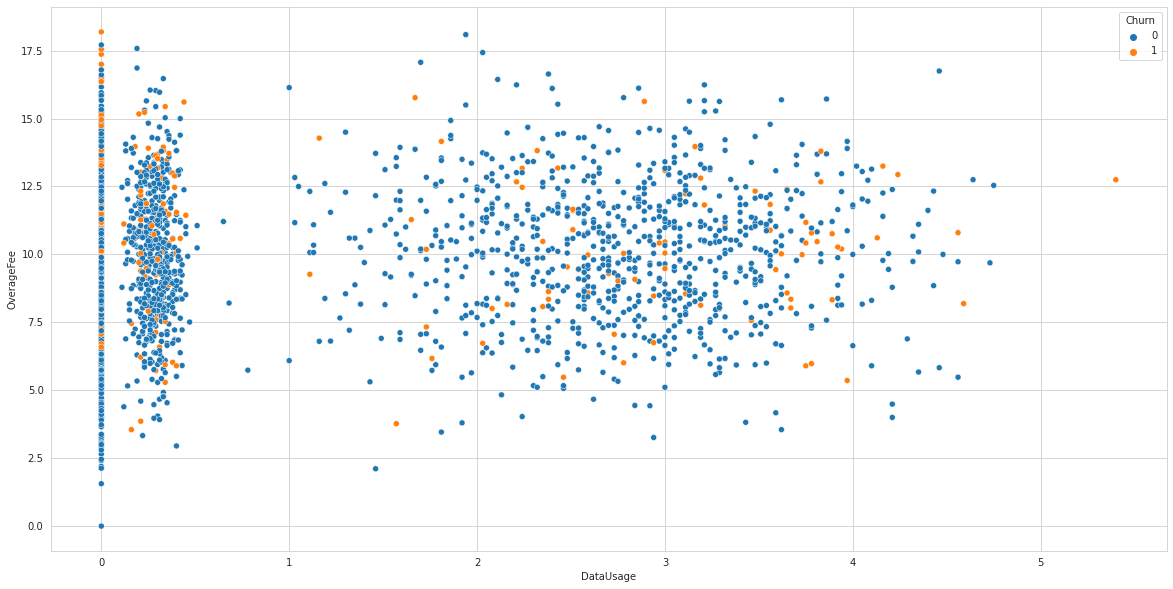

In [283]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.scatterplot(x="DataUsage", y="OverageFee", hue="Churn", data=data)

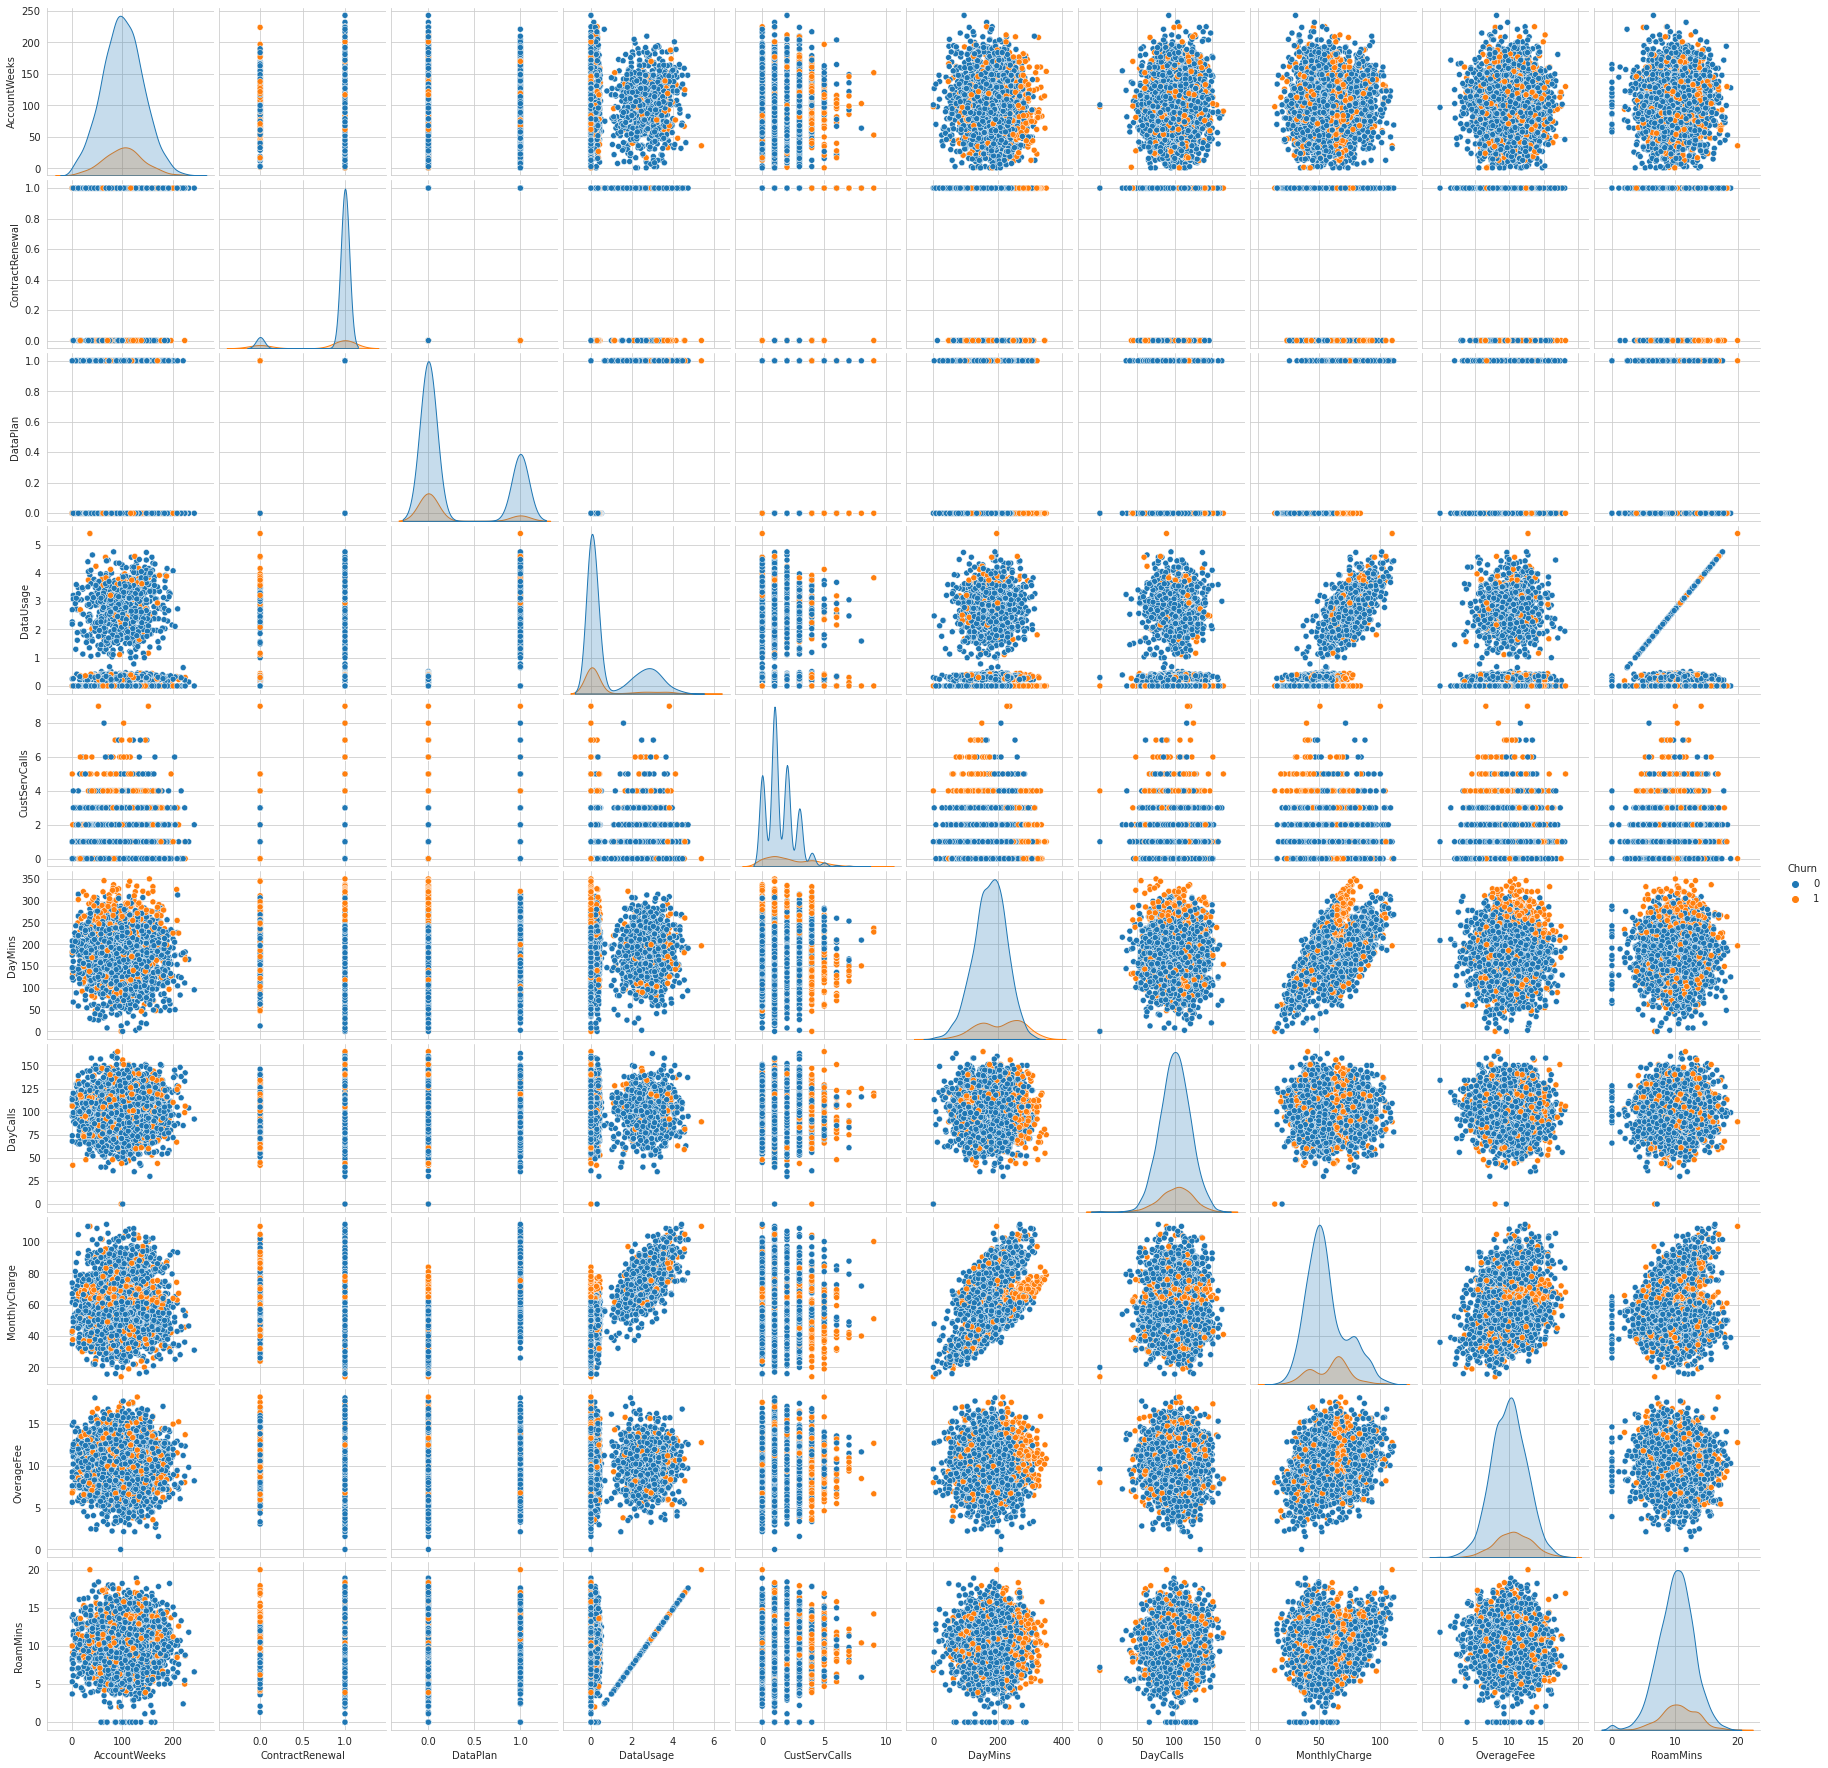

In [173]:
sns.pairplot(data, hue="Churn")

In [284]:
X, y = data.iloc[: , 1:], data.iloc[: , :1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

**Model**

In [285]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4 , random_state=42)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 0.928795342588446
Accuracy of test: 0.9172727272727272


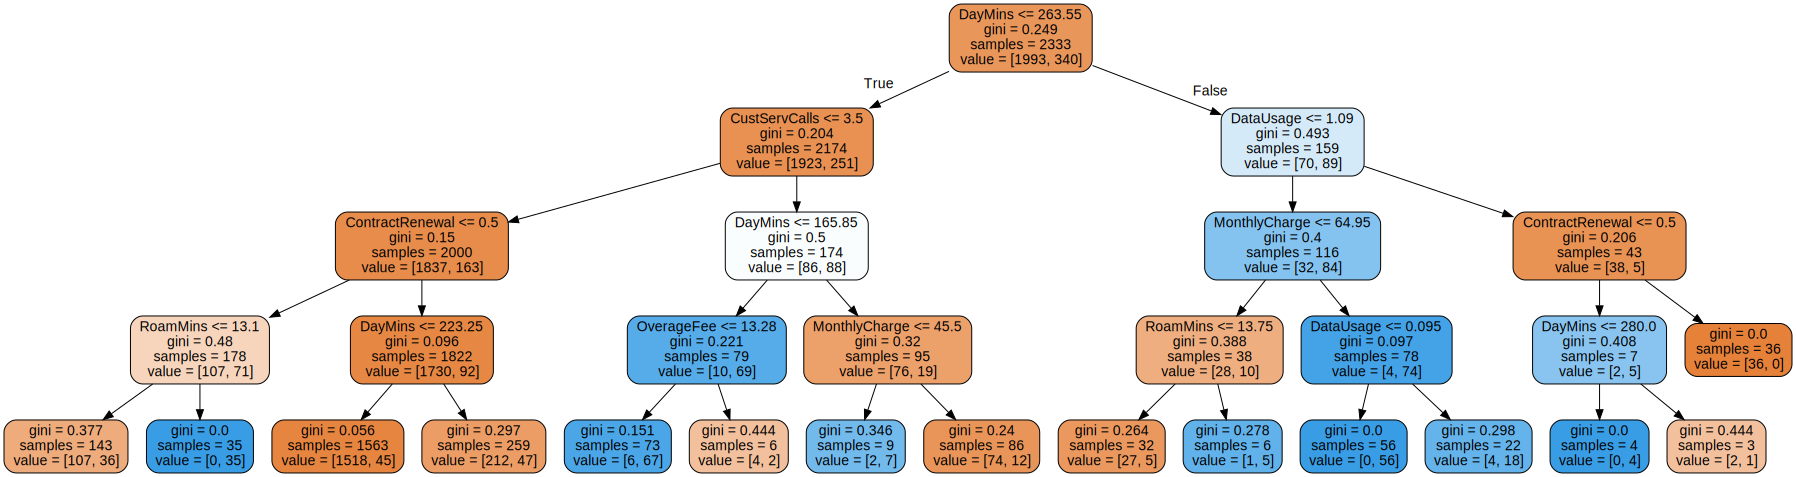

In [265]:
#Visualization

import os
from sklearn.tree import export_graphviz
# We need to locate graphiz directory for visualization (after conda)
os.environ["PATH"] += ';' + r'C:\Users\Dell\Anaconda3\Library\bin\graphviz'

import graphviz

dot_data = export_graphviz(clf, out_file=None,
                     feature_names=X.columns,
                     filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

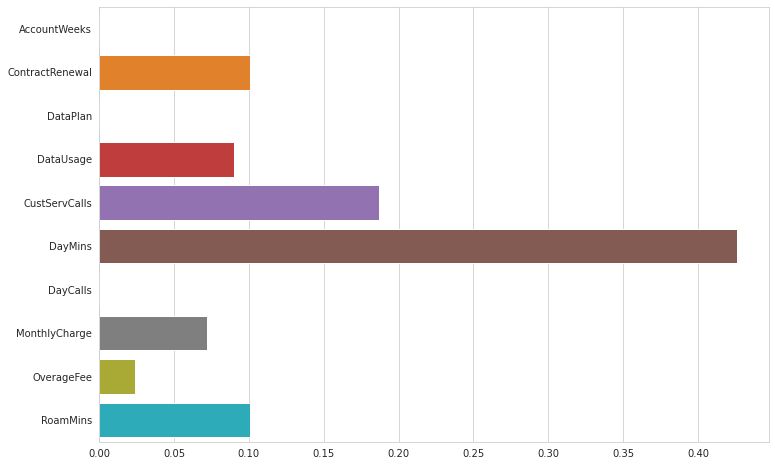

In [286]:
#Feature Importance
plt.figure(figsize=(12, 8))
importance = clf.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.show()

In [287]:
importance

array([0.        , 0.10053174, 0.        , 0.09012621, 0.18680726,
       0.42585806, 0.        , 0.07235187, 0.02369454, 0.10063032])

In [288]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       950
           1       0.79      0.54      0.64       150

    accuracy                           0.92      1100
   macro avg       0.86      0.76      0.80      1100
weighted avg       0.91      0.92      0.91      1100



In [289]:
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.8586000720608427
Recall = 0.7584210526315789
Accuracy = 0.9172727272727272
F1 Score = 0.7967888166856478


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Additional positional arguments to set_ticklabels are ignored, and deprecated since Matplotlib 3.1; passing them will raise a TypeError in Matplotlib 3.3.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Additional positional arguments to set_ticklabels are ignored, and deprecated since Matplotlib 3.1; passing them will raise a TypeError in Matplotlib 3.3.
  import sys


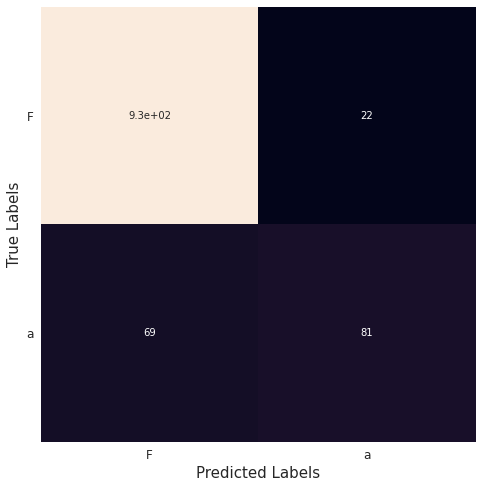

In [290]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels("False","True", fontsize = 12)
ax.yaxis.set_ticklabels("False","True", fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

**Applying Ensemble Learning**

**Xgboost**

In [291]:
import xgboost as xgb
dmatrix_train = xgb.DMatrix(data=X_train, label=y_train)
dmatrix_test = xgb.DMatrix(data=X_test, label=y_test)

In [208]:
param = {'max_depth':3, 
         'eta':1, 
         'objective':'multi:softprob', 
         'num_class':3}

num_round = 5
model = xgb.train(param, dmatrix_train, num_round)

In [292]:
preds = model.predict(dmatrix_test)
preds[:10]

array([[0.13825719, 0.84137887, 0.02036394],
       [0.9681843 , 0.02738799, 0.00442779],
       [0.9687519 , 0.02580963, 0.00543847],
       [0.9781982 , 0.01732822, 0.00447358],
       [0.9681843 , 0.02738799, 0.00442779],
       [0.9585398 , 0.03585415, 0.00560608],
       [0.908509  , 0.08473728, 0.00675368],
       [0.9432617 , 0.05012425, 0.00661405],
       [0.8675358 , 0.1196887 , 0.01277552],
       [0.971333  , 0.02535485, 0.00331209]], dtype=float32)

In [293]:
best_preds = np.asarray([np.argmax(line) for line in preds])

In [294]:
best_preds

array([1, 0, 0, ..., 0, 0, 0])

**METRICS**

In [295]:
print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.8664156794216158
Recall = 0.8001754385964912
Accuracy = 0.9263636363636364


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Additional positional arguments to set_ticklabels are ignored, and deprecated since Matplotlib 3.1; passing them will raise a TypeError in Matplotlib 3.3.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Additional positional arguments to set_ticklabels are ignored, and deprecated since Matplotlib 3.1; passing them will raise a TypeError in Matplotlib 3.3.
  import sys


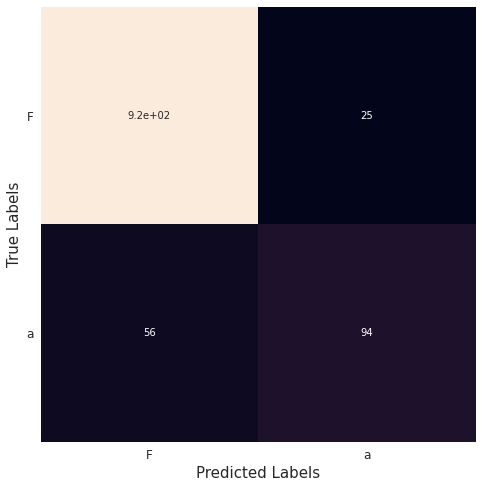

In [296]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, best_preds)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels("False","True", fontsize = 12)
ax.yaxis.set_ticklabels("False","True", fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()